# Build A Machine Learning Model To Predict Input Feature As An Output

- Here we are going for predicting three independent features, they are **Exposure Time, Light of delay, and Layer height** with the help of three features they are **variation in Length, Height and Width**.


# Importing Libraries

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [211]:
df= pd.read_excel('1- DoE and Data.xlsx')

In [212]:
df.head()

,StdOrder,RunOrder,Layer Height,Exposure Time,Light Off Delay,Orientation,Time,Diameter,Length,Height 1,Square Pin Width,Square Pin Length,Height 2,Surface Roughness
0,35,1,0.050,2.25,12,Z,137,4.077,12.035,3.080,2.005,2.125,7.040,2.2
1,10,2,0.075,2.50,12,X,93,4.202,11.935,3.005,2.015,1.975,7.055,1.9
2,2,3,0.100,2.00,13,X,74,4.128,12.020,3.110,2.115,2.070,7.090,2.5
3,31,4,0.050,2.00,13,Z,143,4.148,11.970,3.100,1.975,2.070,7.010,2.0
4,36,5,0.100,2.25,12,Z,70,3.885,12.150,3.215,1.860,2.045,7.010,5.2


# Data Cleaning And Filteration

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StdOrder           45 non-null     int64  
 1   RunOrder           45 non-null     int64  
 2   Layer Height       45 non-null     float64
 3   Exposure Time      45 non-null     float64
 4   Light Off Delay    45 non-null     int64  
 5   Orientation        45 non-null     object 
 6   Time               45 non-null     int64  
 7   Diameter           45 non-null     float64
 8   Length             45 non-null     float64
 9   Height 1           45 non-null     float64
 10  Square Pin Width   45 non-null     float64
 11  Square Pin Length  45 non-null     float64
 12  Height 2           45 non-null     float64
 13  Surface Roughness  45 non-null     float64
dtypes: float64(9), int64(4), object(1)
memory usage: 5.0+ KB


In [214]:
np.sum(df.isna())

StdOrder             0
RunOrder             0
Layer Height         0
Exposure Time        0
Light Off Delay      0
Orientation          0
Time                 0
Diameter             0
Length               0
Height 1             0
Square Pin Width     0
Square Pin Length    0
Height 2             0
Surface Roughness    0
dtype: int64

In [215]:
df.columns

Index(['StdOrder', 'RunOrder', 'Layer Height', 'Exposure Time',
       'Light Off Delay', 'Orientation', 'Time', 'Diameter', 'Length',
       'Height 1', 'Square Pin Width', 'Square Pin Length', 'Height 2',
       'Surface Roughness'],
      dtype='object')

In [216]:
df.drop(['StdOrder', 'RunOrder','Time','Height 1', 'Square Pin Width', 'Square Pin Length'],axis=1,inplace=True)

In [217]:
df.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Diameter,Length,Height 2,Surface Roughness
0,0.050,2.25,12,Z,4.077,12.035,7.040,2.2
1,0.075,2.50,12,X,4.202,11.935,7.055,1.9
2,0.100,2.00,13,X,4.128,12.020,7.090,2.5
3,0.050,2.00,13,Z,4.148,11.970,7.010,2.0
4,0.100,2.25,12,Z,3.885,12.150,7.010,5.2


In [218]:
df1=df.copy()

In [219]:
df1['Diameter']=df1['Diameter']-4
df1['Length']=df1['Length']-12
df1['Height 2']=df1['Height 2']-7


In [220]:
df1.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Diameter,Length,Height 2,Surface Roughness
0,0.050,2.25,12,Z,0.077,0.035,0.040,2.2
1,0.075,2.50,12,X,0.202,-0.065,0.055,1.9
2,0.100,2.00,13,X,0.128,0.020,0.090,2.5
3,0.050,2.00,13,Z,0.148,-0.030,0.010,2.0
4,0.100,2.25,12,Z,-0.115,0.150,0.010,5.2


In [221]:
cols= ['Diameter', 'Length', 'Height 2']
for i in cols:
    try:
        df1.drop(df1[df1[i]==0].index[0],axis=0,inplace=True)
    except:
        df1

In [222]:
df1.rename(columns={'Layer Height':'lr_h','Exposure Time':'exp_t','Light Off Delay':'lod','Orientation':'orient',
                   'Diameter':'D1','Length':'L1','Height 2':'H2'},inplace=True)

In [223]:
df1.columns

Index(['lr_h', 'exp_t', 'lod', 'orient', 'D1', 'L1', 'H2',
       'Surface Roughness'],
      dtype='object')

In [224]:
df1.head()

,lr_h,exp_t,lod,orient,D1,L1,H2,Surface Roughness
0,0.050,2.25,12,Z,0.077,0.035,0.040,2.2
1,0.075,2.50,12,X,0.202,-0.065,0.055,1.9
2,0.100,2.00,13,X,0.128,0.020,0.090,2.5
3,0.050,2.00,13,Z,0.148,-0.030,0.010,2.0
4,0.100,2.25,12,Z,-0.115,0.150,0.010,5.2


# Data Visualisation and Prediction

# Linear Regression model 


MSE: 0.00028007441453849126 and Y Predicted: 0.07835811867816211


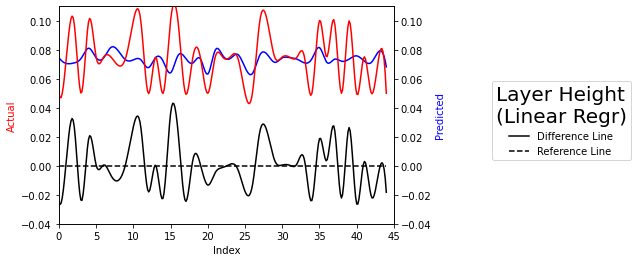

<Figure size 720x360 with 0 Axes>

In [225]:
test_dataframe= {}
def development_of_graph(x,  y,  model,  input_,  model_name,  data_frame,  outcome,  title, lower_lim, upper_lim, k):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
    
    model.fit(x_train,y_train)
    y_pred=model.predict(input_)
    
    MSE=mean_squared_error(y_test, model.predict(x_test))
    test_dataframe[model_name]=MSE, y_pred[0]
    print(f'MSE: {MSE} and Y Predicted: {y_pred[0]}')


    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.interpolate import make_interp_spline
    
    df1= data_frame
    
    y_pred=model.predict(x)
    y= y_pred
    x= df1.index
    y1= df1[outcome].values
    xnew = np.linspace(x.min(), x.max(), 300)

    gfg1 = make_interp_spline(x, y, k=k)
    gfg2= make_interp_spline(x,y1,k=k)
    y = gfg1(xnew)
    y1= gfg2(xnew)

    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(xnew, y,'-b')
    ax2.plot(xnew, y1, color="red")
    ax2.plot(xnew, y1-y, color="black" , label= 'Difference Line')
    ax2.plot(xnew, y1-y1, linestyle='dashed', color='black', label= 'Reference Line' )

    ax1.set_ylim(lower_lim,upper_lim)
    ax2.set_ylim(lower_lim, upper_lim)
    ax1.set_xlim(0,45)
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Actual', color='r')
    ax2.set_ylabel('Predicted', color='b')
    ax2.legend(title=title,title_fontsize=20,loc='lower center', bbox_to_anchor=(1.5,0.27))
    # plotting a line plot after changing it's width and height
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(5)


    plt.show();
    
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model =LinearRegression()    
development_of_graph(df1[['D1','L1', 'H2']],  df1.lr_h,  lr_model,  [[0,0,0]],  'linear regression',  df1,  'lr_h',
                     'Layer Height\n(Linear Regr)', -0.04, 0.11, 3)

# KNN Model

MSE: 0.00033653846153846163 and Y Predicted: 0.1


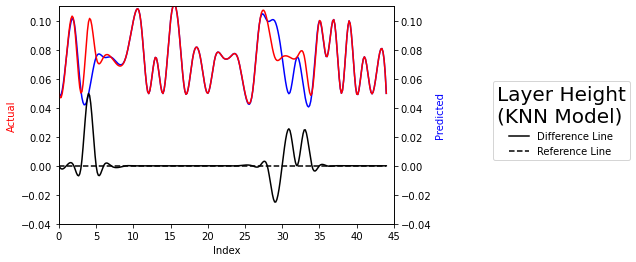

<Figure size 720x360 with 0 Axes>

In [226]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
KNN_model =KNeighborsRegressor(n_neighbors=1)    
development_of_graph(df1[['D1','L1', 'H2']],  df1.lr_h,  KNN_model,  [[0,0,0]],  'KNN regressor',  df1,  'lr_h',
                     'Layer Height\n(KNN Model)', -0.04, 0.11,3)

# Ridge Regression

MSE: 0.00033618658837323336 and Y Predicted: 0.07373718837695199


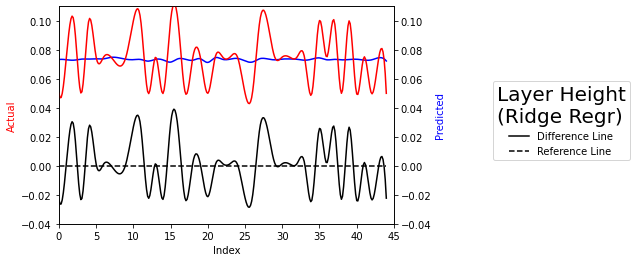

<Figure size 720x360 with 0 Axes>

In [227]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge_reg_model =Ridge()    
development_of_graph(df1[['D1','L1', 'H2']],  df1.lr_h,  ridge_reg_model,  [[0,0,0]],  'Ridge Regression',  df1,  'lr_h',
                     'Layer Height\n(Ridge Regr)', -0.04, 0.11,3)  

# DecisionTreeRegression

MSE: 0.00038461538461538456 and Y Predicted: 0.1


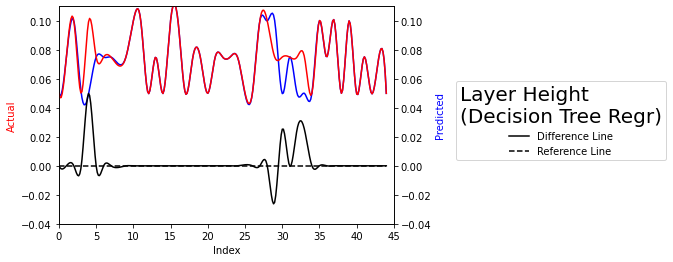

<Figure size 720x360 with 0 Axes>

In [228]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dec_tree_model =DecisionTreeRegressor()    
development_of_graph(df1[['D1','L1', 'H2']],  df1.lr_h,  dec_tree_model,  [[0,0,0]],  'Decision Tree Regression',  df1,  'lr_h',
                     'Layer Height\n(Decision Tree Regr)', -0.04, 0.11,3) 

# RandomForestRegressor

MSE: 0.00025379807692307784 and Y Predicted: 0.08974999999999987


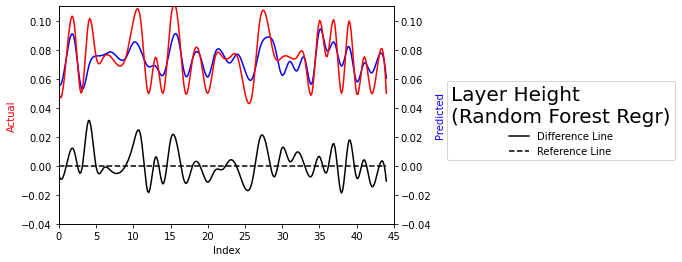

<Figure size 720x360 with 0 Axes>

In [229]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rand_forest_model =RandomForestRegressor()    
development_of_graph(df1[['D1','L1', 'H2']],  df1.lr_h,  rand_forest_model,  [[0,0,0]],  'Random Forest Regression',  df1,  'lr_h',
                     'Layer Height\n(Random Forest Regr)', -0.04, 0.11,3)  

In [230]:
test_df=pd.DataFrame(data=test_dataframe,index=['MSE_LH','Layer Height']).T
test_df

,MSE_LH,Layer Height
linear regression,0.000280,0.078358
KNN regressor,0.000337,0.100000
Ridge Regression,0.000336,0.073737
Decision Tree Regression,0.000385,0.100000
Random Forest Regression,0.000254,0.089750


# Linear Regression model 
- Input parameters are - variation in Diameter, Length, Height
- Output parameter is Exposure Time

In [231]:
df1.exp_t=df1.exp_t/2.5

In [232]:
df1.head()

,lr_h,exp_t,lod,orient,D1,L1,H2,Surface Roughness
0,0.050,0.9,12,Z,0.077,0.035,0.040,2.2
1,0.075,1.0,12,X,0.202,-0.065,0.055,1.9
2,0.100,0.8,13,X,0.128,0.020,0.090,2.5
3,0.050,0.8,13,Z,0.148,-0.030,0.010,2.0
4,0.100,0.9,12,Z,-0.115,0.150,0.010,5.2


In [233]:
test_dataframe_exp_t= {}

def developing_graph(x,  y,  model,  input_,  model_name,  data_frame,  outcome,  title,  k,  outcome_list,  multiplier_factor):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

    model.fit(x_train,y_train)
    y_pred=model.predict(input_)*multiplier_factor
    
    MSE=mean_squared_error(y_test,model.predict(x_test))
    outcome_list[model_name]=MSE, y_pred[0]
    print(f'MSE: {MSE} and Y Predicted: {y_pred[0]}')

    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.interpolate import make_interp_spline
    y_pred=model.predict(x)
    
    df1= data_frame
    y= y_pred
    x= df1.index
    y1= df1[outcome].values
    xnew = np.linspace(x.min(), x.max(), 300)

    gfg1 = make_interp_spline(x, y, k=k)
    gfg2= make_interp_spline(x,y1,k=k)
    y = gfg1(xnew)
    y1= gfg2(xnew)

    fig, (ax0,ax1) = plt.subplots(2,1, sharex=True)
    plt.figure(figsize=(10,15))
    ax2 = ax1.twinx()
    ax3 = ax0.twinx()

    ax1.set_ylim(-0.2,0.2)
    ax0.set_ylim(0.75,1.05)
    ax2.set_ylim(-0.2,0.2)
    ax3.set_ylim(0.75,1.05)

    ax1.plot(xnew, y1-y, color="black" , label= 'difference line')
    ax1.plot(xnew, y1-y1, linestyle='dashed', color='black', label= 'reference line' )

    ax0.plot(xnew, y,'-b', label= 'predicted' )
    ax3.plot(xnew, y1, color="red" , label= 'Actual' )


    ax1.set_xlim(0,45)
    ax1.set_xlabel('Sample Data')
    # ax0.set_ylabel('Exposure Time', color='r')
    # ax3.set_ylabel('predicted Exp_t', color='b')
    ax1.legend(title=title,  title_fontsize=30,loc='lower center',  bbox_to_anchor=(1.5,1))
    ax0.legend(loc='lower center', bbox_to_anchor=(1.5,-0.5))
    ax3.legend(loc='lower center', bbox_to_anchor=(1.5,-0.7))
    # hide the spines between ax and ax2
    ax0.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax3.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax0.xaxis.tick_top()
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax1.xaxis.tick_bottom()

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax0.transAxes, color='k', clip_on=False)
    ax0.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax0.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal



    plt.show();

MSE: 0.006012057632746802 and Y Predicted: 2.189733654996323


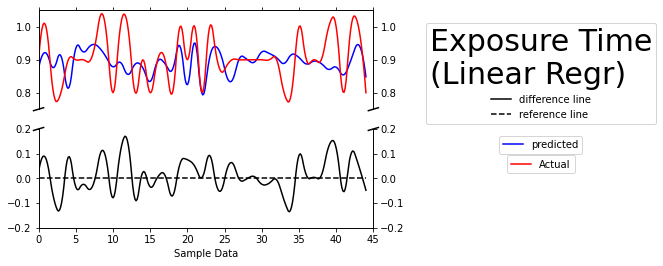

<Figure size 720x1080 with 0 Axes>

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model =LinearRegression()    
developing_graph(df1[['D1','L1', 'H2']],  df1.exp_t,  lr_model,  [[0,0,0]],  'linear regression',  df1,  'exp_t',
                     'Exposure Time\n(Linear Regr)',2,   test_dataframe_exp_t, 2.5)

# KNN Model

MSE: 0.011538461538461532 and Y Predicted: 2.25


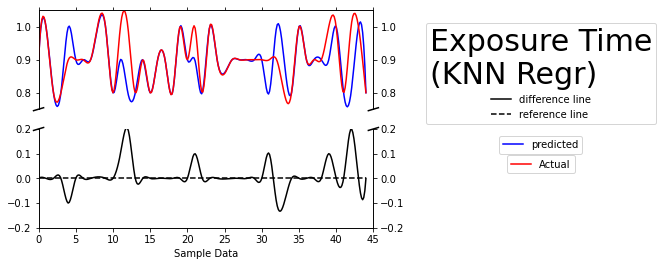

<Figure size 720x1080 with 0 Axes>

In [235]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
KNN_model =KNeighborsRegressor(n_neighbors=1)    
developing_graph(df1[['D1','L1', 'H2']],  df1.exp_t,  KNN_model,  [[0,0,0]],  'KNN regressor',  df1,  'exp_t',
                     'Exposure Time\n(KNN Regr)',3,   test_dataframe_exp_t, 2.5)  

# Ridge Regression

MSE: 0.005288383077735191 and Y Predicted: 2.22772598312936


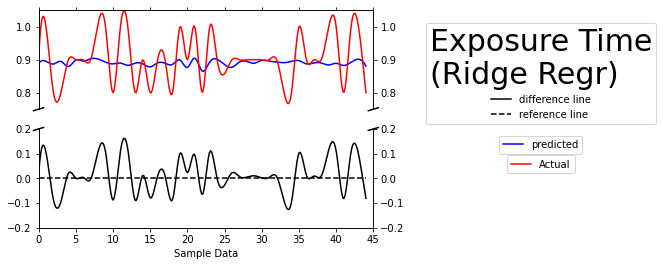

<Figure size 720x1080 with 0 Axes>

In [236]:
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error
ridge_model =Ridge()    
developing_graph(df1[['D1','L1', 'H2']],  df1.exp_t,  ridge_model,  [[0,0,0]],  'Ridge Regression',  df1,  'exp_t',
                     'Exposure Time\n(Ridge Regr)',3,   test_dataframe_exp_t, 2.5) 

# DecisionTreeRegression

MSE: 0.009999999999999993 and Y Predicted: 2.5


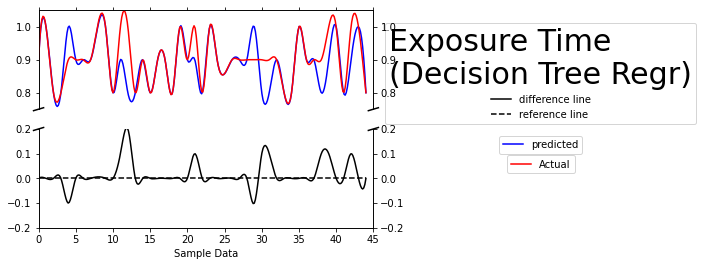

<Figure size 720x1080 with 0 Axes>

In [237]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dec_tree_model =DecisionTreeRegressor()    
developing_graph(df1[['D1','L1', 'H2']],  df1.exp_t,  dec_tree_model,  [[0,0,0]],  'Decision Tree Regression',  df1,  'exp_t',
                     'Exposure Time\n(Decision Tree Regr)',3,   test_dataframe_exp_t, 2.5)

# RandomForestRegressor

MSE: 0.008571307692307724 and Y Predicted: 2.4250000000000007


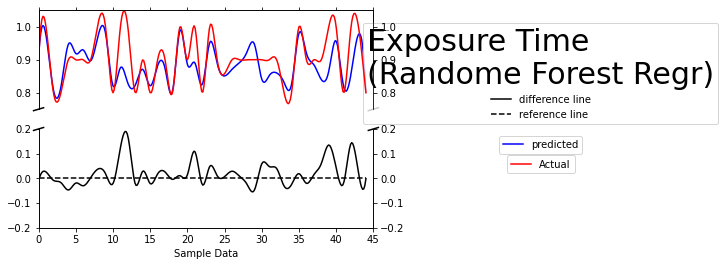

<Figure size 720x1080 with 0 Axes>

In [238]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
rand_forest_model =RandomForestRegressor()    
developing_graph(df1[['D1','L1', 'H2']],  df1.exp_t,  rand_forest_model,  [[0,0,0]],  'Random Forest Regression',  df1,  'exp_t',
                     'Exposure Time\n(Randome Forest Regr)',3,   test_dataframe_exp_t, 2.5)

In [239]:
test_df_exp_t= pd.DataFrame(data=test_dataframe_exp_t,index=['MSE_ET','Exposure Time']).T
test_df_exp_t

,MSE_ET,Exposure Time
linear regression,0.006012,2.189734
KNN regressor,0.011538,2.250000
Ridge Regression,0.005288,2.227726
Decision Tree Regression,0.010000,2.500000
Random Forest Regression,0.008571,2.425000


# Linear Regression model 
### Input parameters are - variation in Diameter, Length, Height
### Output parameter is Light Off Delay

In [240]:
df1.lod=df1.lod/14

MSE: 0.0018230749149106748 and Y Predicted: 12.810625395971227


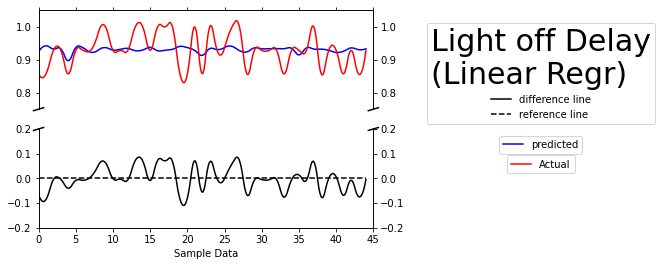

<Figure size 720x1080 with 0 Axes>

In [241]:
test_dataframe_lod= {}
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model =LinearRegression()    
test_dataframe={}
developing_graph(df1[['D1','L1', 'H2']],  df1.lod,  lr_model,  [[0,0,0]],  'linear regression',  df1,  'lod',
                     'Light off Delay\n(Linear Regr)',2, test_dataframe_lod, 14)

# Ridge Regression

MSE: 0.0019859868281547053 and Y Predicted: 13.021741442457461


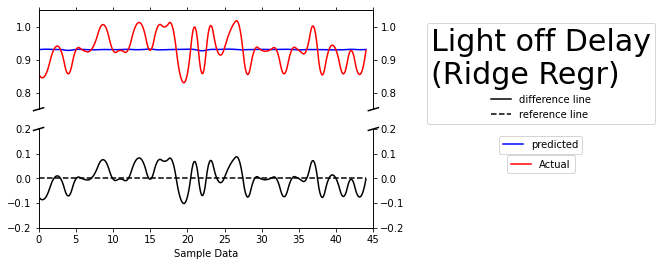

<Figure size 720x1080 with 0 Axes>

In [242]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge_model =Ridge()    
developing_graph(df1[['D1','L1', 'H2']],  df1.lod,  ridge_model,  [[0,0,0]],  'Ridge Regression',  df1,  'lod',
                     'Light off Delay\n(Ridge Regr)',2, test_dataframe_lod, 14)

# DecisionTreeRegressor

MSE: 0.003532182103610677 and Y Predicted: 13.0


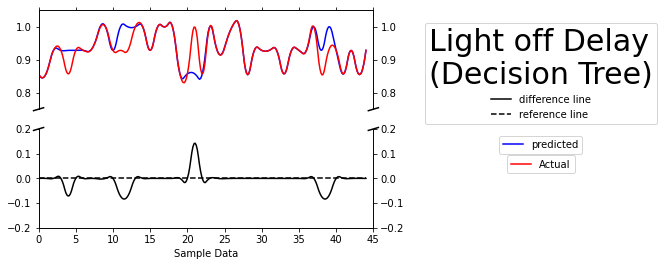

<Figure size 720x1080 with 0 Axes>

In [243]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
decision_tree_model =DecisionTreeRegressor()    
developing_graph(df1[['D1','L1', 'H2']],  df1.lod,  decision_tree_model,  [[0,0,0]],  'Decision Tree Regression',  df1,  'lod',
                     'Light off Delay\n(Decision Tree)',2, test_dataframe_lod, 14)

# RandomForest

MSE: 0.001771664050235492 and Y Predicted: 12.630000000000011


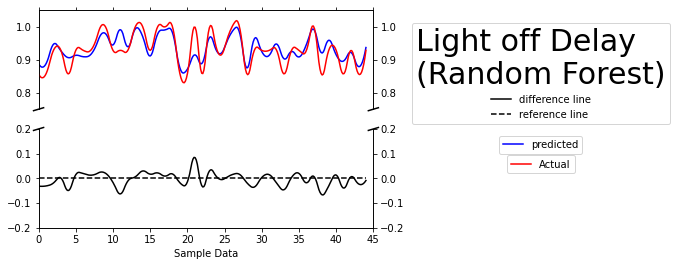

<Figure size 720x1080 with 0 Axes>

In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rand_forest_model =RandomForestRegressor()    
developing_graph(df1[['D1','L1', 'H2']],  df1.lod,  rand_forest_model,  [[0,0,0]],  'Random Forest Regression',  df1,  'lod',
                     'Light off Delay\n(Random Forest)',2, test_dataframe_lod, 14)

# KNN Model

MSE: 0.002998430141287288 and Y Predicted: 12.799999999999999


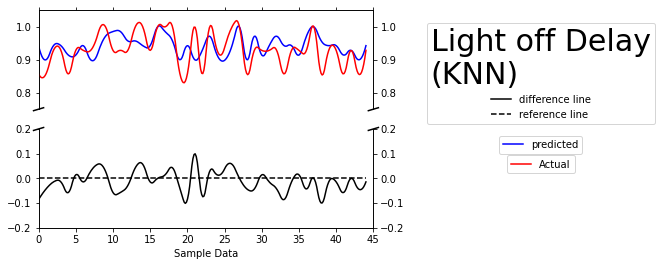

<Figure size 720x1080 with 0 Axes>

In [245]:
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.metrics import mean_squared_error
KNN_model =KNeighborsRegressor()    
developing_graph(df1[['D1','L1', 'H2']],  df1.lod,  KNN_model,  [[0,0,0]],  'KNN regressor',  df1,  'lod',
                     'Light off Delay\n(KNN)',2,  test_dataframe_lod, 14)

In [246]:
test_df_lod= pd.DataFrame(data=test_dataframe_lod,index=['MSE_LOD','Light Off Delay']).T
test_df_lod

,MSE_LOD,Light Off Delay
linear regression,0.001823,12.810625
Ridge Regression,0.001986,13.021741
Decision Tree Regression,0.003532,13.000000
Random Forest Regression,0.001772,12.630000
KNN regressor,0.002998,12.800000


In [247]:
pd.concat([test_df,test_df_exp_t,test_df_lod],axis=1)

,MSE_LH,Layer Height,MSE_ET,Exposure Time,MSE_LOD,Light Off Delay
linear regression,0.000280,0.078358,0.006012,2.189734,0.001823,12.810625
KNN regressor,0.000337,0.100000,0.011538,2.250000,0.002998,12.800000
Ridge Regression,0.000336,0.073737,0.005288,2.227726,0.001986,13.021741
Decision Tree Regression,0.000385,0.100000,0.010000,2.500000,0.003532,13.000000
Random Forest Regression,0.000254,0.089750,0.008571,2.425000,0.001772,12.630000


In [248]:
df1.head()

,lr_h,exp_t,lod,orient,D1,L1,H2,Surface Roughness
0,0.050,0.9,0.857143,Z,0.077,0.035,0.040,2.2
1,0.075,1.0,0.857143,X,0.202,-0.065,0.055,1.9
2,0.100,0.8,0.928571,X,0.128,0.020,0.090,2.5
3,0.050,0.8,0.928571,Z,0.148,-0.030,0.010,2.0
4,0.100,0.9,0.857143,Z,-0.115,0.150,0.010,5.2
